# Image Processing HW2 
**Avisa Fallah 610398208**


##Libraries

In [133]:
import cv2
import cv2 as cv
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ImageProcessing/HW2/Dataset
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ImageProcessing/HW2/Dataset


##Filtering in Spatial Domain

###a) Apply Average(Mean) filter 5*5 on image1

original image1 before and after mean filter


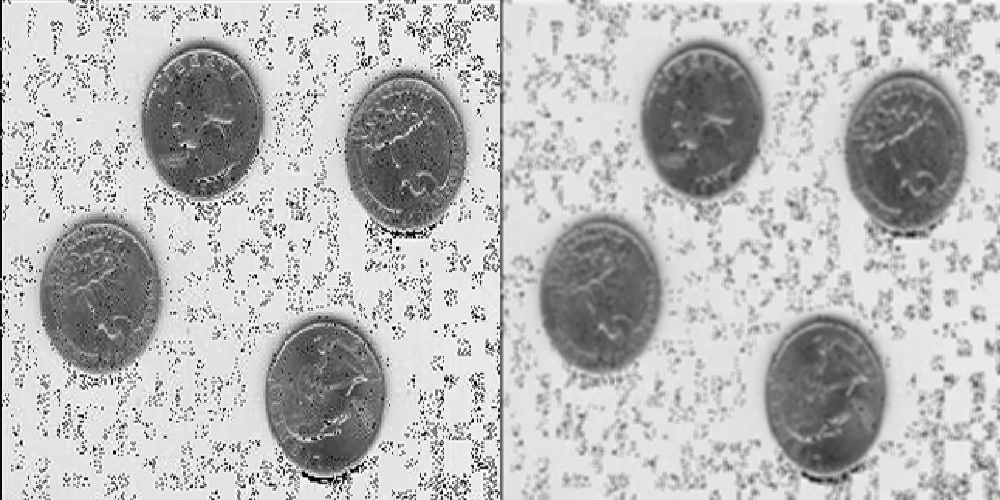

In [134]:
# Load the image from a file
img1 = cv2.imread('image1.jpg')

# Define the kernel for the filter
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)

# Apply the filter
mean_img = cv2.filter2D(img1, -1, kernel)

# display the original and filtered images side by side
before_after_mean = np.hstack([img1, mean_img])
print('original image1 before and after mean filter')
cv2_imshow(before_after_mean)

original image1 before and after blur filter


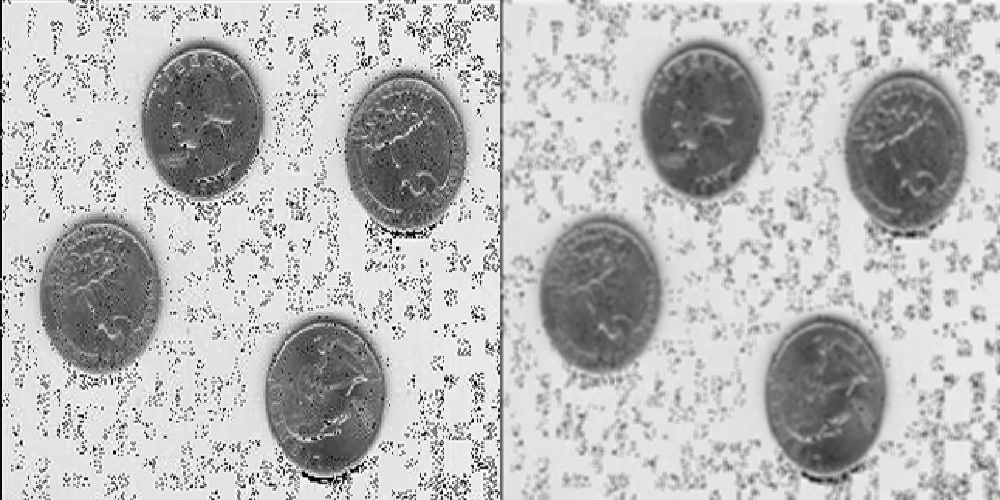

In [135]:
# Load the image from a file
img1 = cv2.imread('image1.jpg')

blur = cv2.blur(img1,(5,5))

# display the original and filtered images side by side
before_after_mean = np.hstack([img1, blur])
print('original image1 before and after blur filter')
cv2_imshow(before_after_mean)


###b) Apply Median filter 5*5 on image2



original image2 before and after median filter


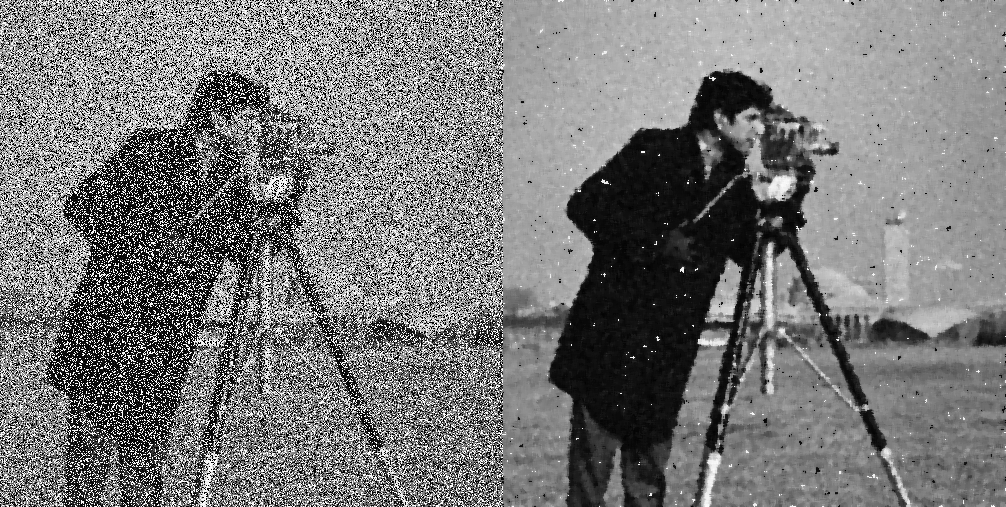

In [136]:
# Load the image
img2 = cv2.imread('image2.jpg')

# Apply the median filter
median_img = cv2.medianBlur(img2, 5)

# display the original and filtered images side by side
before_after_median = np.hstack([img2, median_img])
print('original image2 before and after median filter')
cv2_imshow(before_after_median)



###c) Apply Laplacian filter 5*5 on image3


original image3 before and after laplacian filter


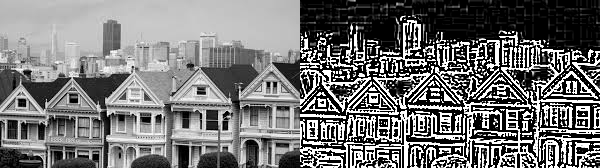

In [137]:
# Load the image
img3 = cv2.imread('image3.jpg', 0)

# apply Laplacian filter with a kernel size of 5x5
laplacian = cv2.Laplacian(img3, cv2.CV_64F, ksize=5)

# display the original and filtered images side by side
before_after_laplacian = np.hstack([img3, laplacian])
print('original image3 before and after laplacian filter')
cv2_imshow(before_after_laplacian)




###d) Sobel(X and Y) filter 7*7 on image4


original image4 before and after sobel X filter


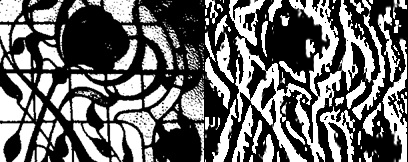


original image4 before and after sobel Y filter


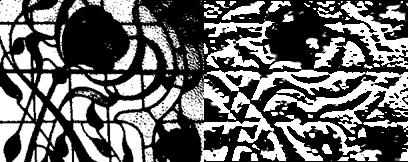


original image4 before and after sobel X and Y filter


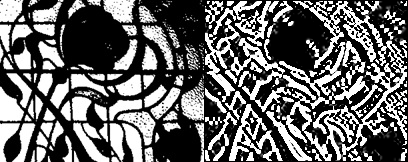

In [138]:
# Load the image
img4 = cv2.imread('image4.jpg', 0)

# Apply the Sobel filter on the X-axis
sobel_x = cv2.Sobel(img4, cv2.CV_64F, 1, 0, ksize=7)

# Apply the Sobel filter on the Y-axis
sobel_y = cv2.Sobel(img4, cv2.CV_64F, 0, 1, ksize=7)

# Apply the Sobel filter on the X-axis and Y-axis
sobel_x_y = cv2.Sobel(img4, cv2.CV_64F, 1, 1, ksize=7)

# display the original and filtered images side by side
before_after_sobel_x = np.hstack([img4, sobel_x])
before_after_sobel_y = np.hstack([img4, sobel_y])
before_after_sobel_x_y = np.hstack([img4, sobel_x_y])
print('original image4 before and after sobel X filter')
cv2_imshow(before_after_sobel_x)
print('\noriginal image4 before and after sobel Y filter')
cv2_imshow(before_after_sobel_y)
print('\noriginal image4 before and after sobel X and Y filter')
cv2_imshow(before_after_sobel_x_y)




##Filtering in Frequency Domain

##(a) Apply frequency spectrum with Fast Fourier Transformation (FFT), centered spectrum, decentralized spectrum and inverse FFT on image5 


/usr/local/lib/python3.10/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


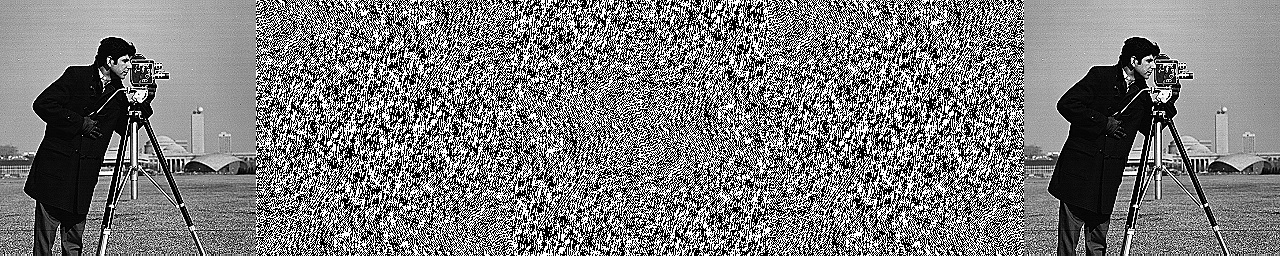

In [139]:
# read the input image
img5 = cv2.imread('image5.jpg',0)

img5a = np.fft.fft2(img5)
img5b = np.fft.fftshift(img5a)
img5c = np.fft.ifftshift(img5b)
img5d = np.fft.ifft2(img5c)

result = np.hstack([img5, img5a, img5b, img5c, img5d])
cv2_imshow(result)

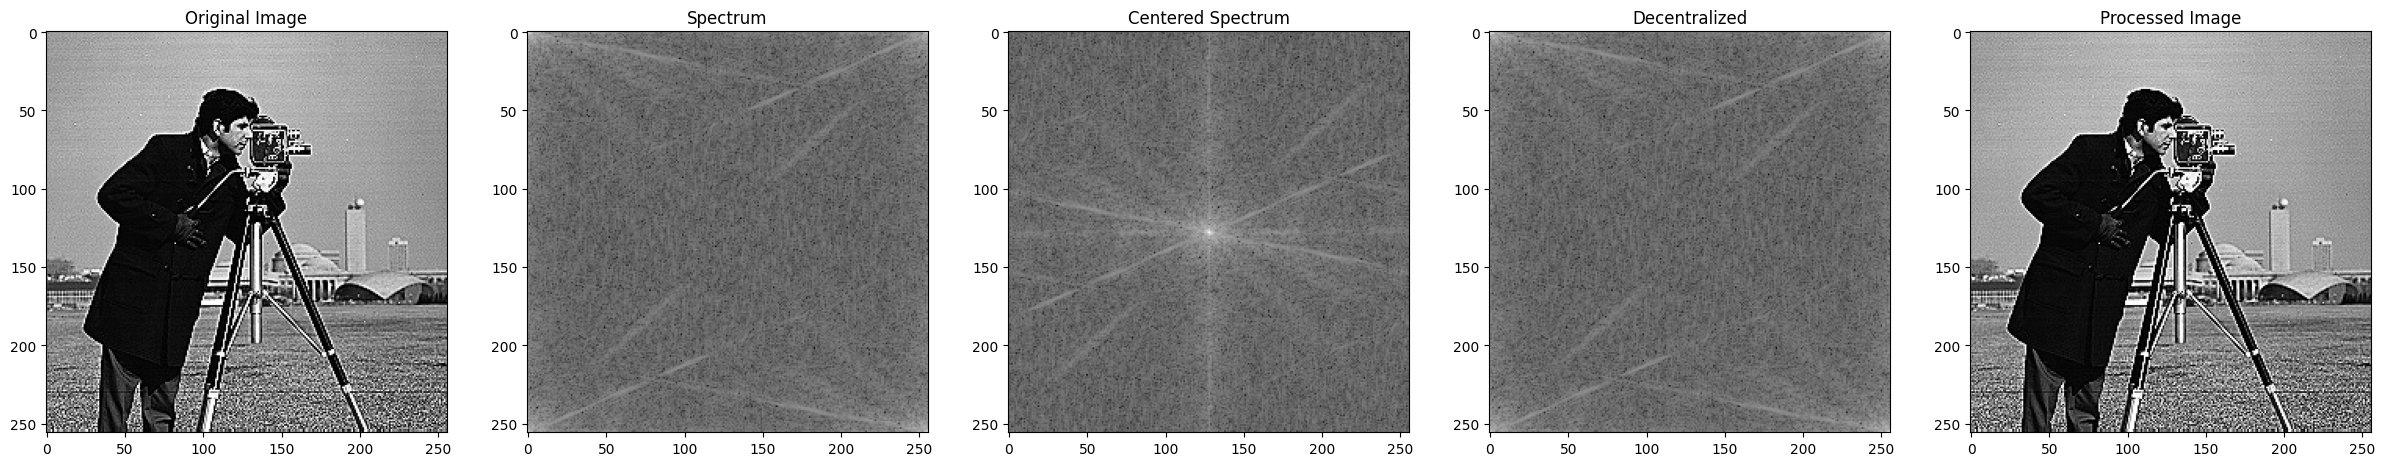

In [140]:
# read the input image
img5 = cv2.imread('image5.jpg',0)

img5a = np.fft.fft2(img5)
img5b = np.fft.fftshift(img5a)
img5c = np.fft.ifftshift(img5b)
img5d = np.fft.ifft2(img5c)

plt.figure(figsize=(6*5, 4*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img5, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img5a)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img5b)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img5c)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img5d), "gray"), plt.title("Processed Image")
plt.show()

##(b) Apply Ideal Low Pass Filter (ILPF) and Ideal High Pass Filter (IHPF) on image5 


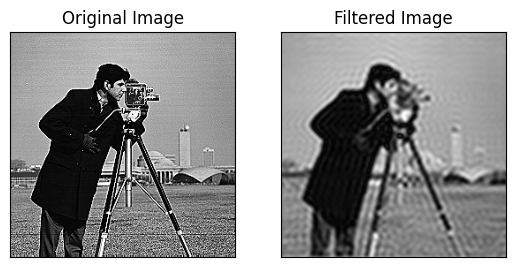

In [141]:
# read the input image
img5 = cv2.imread('image5.jpg',0)

# Define the cutoff frequency
cutoff_frequency = 30
# Take the Fourier Transform of the image
f = np.fft.fft2(img5)
# Shift the zero-frequency component to the center
fshift = np.fft.fftshift(f)

# Create a filter mask
rows, cols = img5.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow - cutoff_frequency:crow + cutoff_frequency, ccol - cutoff_frequency:ccol + cutoff_frequency] = 1
# Apply the filter mask
fshift = fshift * mask

# Shift the zero-frequency component back to the top-left corner
f_ishift = np.fft.ifftshift(fshift)

# Take the inverse Fourier Transform of the filtered image
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

# Display the original and filtered images
plt.subplot(121), plt.imshow(img5, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

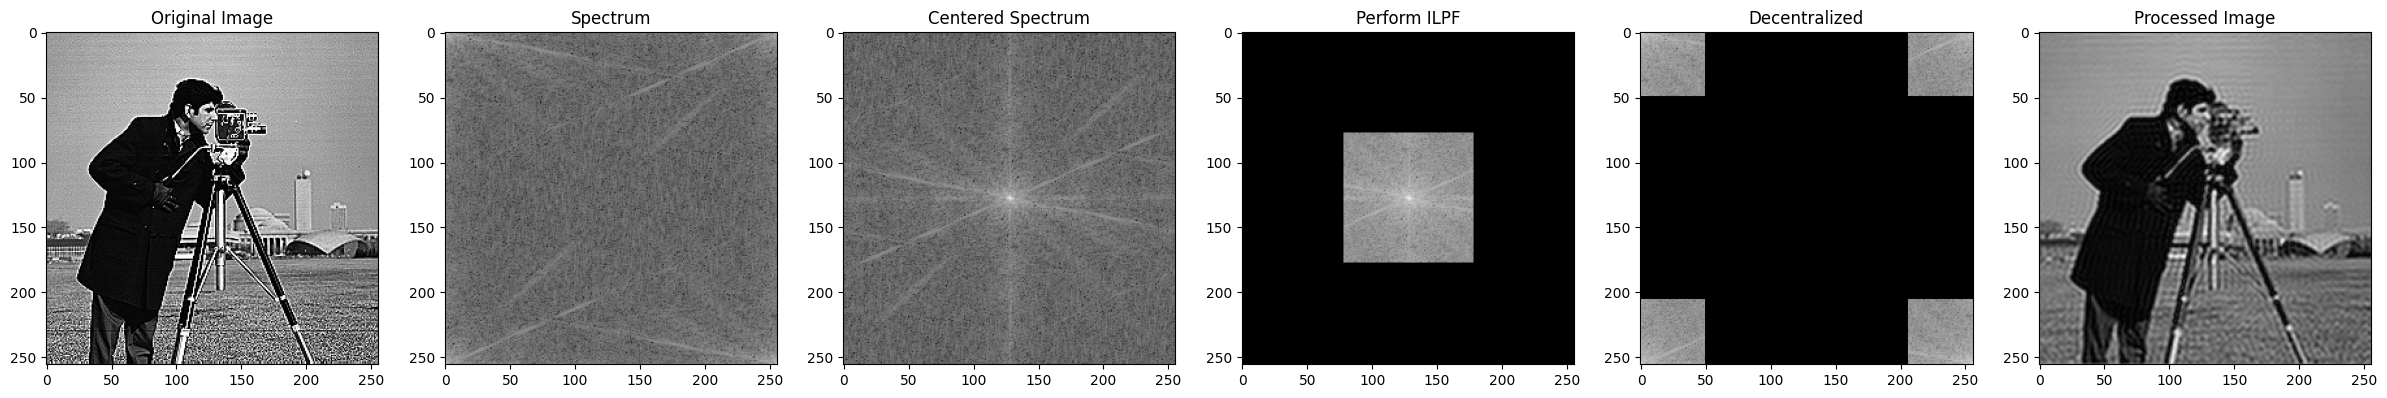

In [142]:
def lowPassFiltering(img,size):
    h, w = img.shape[0:2]
    h1,w1 = int(h/2), int(w/2)
    mask = np.zeros((h, w), np.uint8)
    mask[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 1
    imgT=mask*img 
    return imgT

# read the input image
img5 = cv2.imread('image5.jpg',0)
img5a = np.fft.fft2(img5)
img5b = np.fft.fftshift(img5a)
img5c = lowPassFiltering(img5b, 100)
img5d = np.fft.ifftshift(img5c)
img5e = np.fft.ifft2(img5d)

plt.figure(figsize=(6*5, 4*5), constrained_layout=False)
plt.subplot(161), plt.imshow(img5, "gray"), plt.title("Original Image")
plt.subplot(162), plt.imshow(np.log(1+np.abs(img5a)), "gray"), plt.title("Spectrum")
plt.subplot(163), plt.imshow(np.log(1+np.abs(img5b)), "gray"), plt.title("Centered Spectrum")
plt.subplot(164), plt.imshow(np.log(1+np.abs(img5c)), "gray"), plt.title("Perform ILPF")
plt.subplot(165), plt.imshow(np.log(1+np.abs(img5d)), "gray"), plt.title("Decentralized")
plt.subplot(166), plt.imshow(np.abs(img5e), "gray"), plt.title("Processed Image")
plt.show()

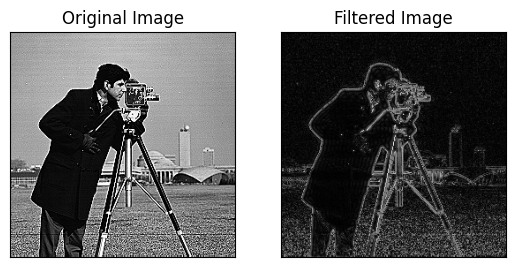

In [143]:
# read the input image
img5 = cv2.imread('image5.jpg',0)

# Define the cutoff frequency
cutoff_frequency = 30
# Take the Fourier Transform of the image
f = np.fft.fft2(img5)
# Shift the zero-frequency component to the center
fshift = np.fft.fftshift(f)

# Create a filter mask
rows, cols = img5.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[crow - cutoff_frequency:crow + cutoff_frequency, ccol - cutoff_frequency:ccol + cutoff_frequency] = 0
# Apply the filter mask
fshift = fshift * mask

# Shift the zero-frequency component back to the top-left corner
f_ishift = np.fft.ifftshift(fshift)

# Take the inverse Fourier Transform of the filtered image
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

# Display the original and filtered images
plt.subplot(121), plt.imshow(img5, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

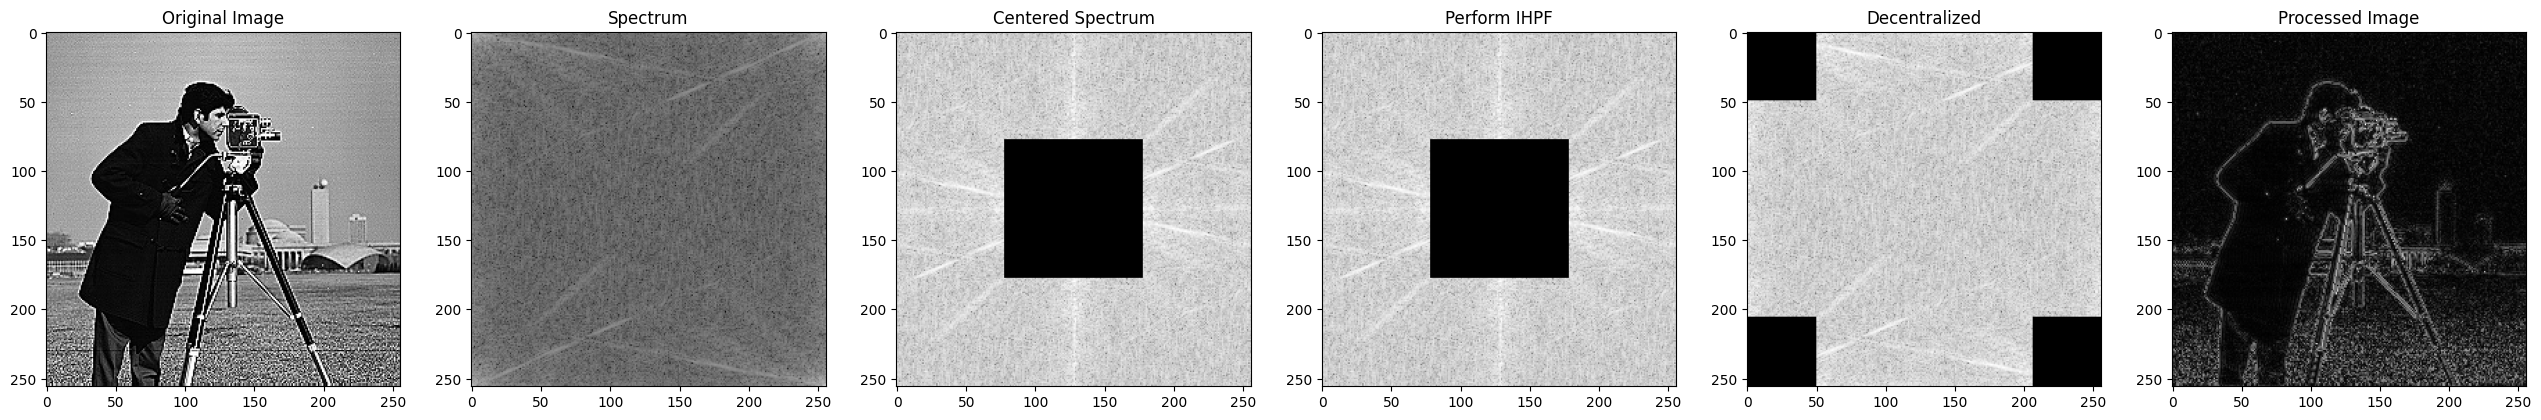

In [144]:
def highPassFiltering(img,size):
    h, w = img.shape[0:2]
    h1,w1 = int(h/2), int(w/2)
    img[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 0
    return img


# read the input image
img5 = cv2.imread('image5.jpg',0)
img5a = np.fft.fft2(img5)
img5b = np.fft.fftshift(img5a)
img5c = highPassFiltering(img5b, 100)
img5d = np.fft.ifftshift(img5c)
img5e = np.fft.ifft2(img5d)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(161), plt.imshow(img5, "gray"), plt.title("Original Image")
plt.subplot(162), plt.imshow(np.log(1+np.abs(img5a)), "gray"), plt.title("Spectrum")
plt.subplot(163), plt.imshow(np.log(1+np.abs(img5b)), "gray"), plt.title("Centered Spectrum")
plt.subplot(164), plt.imshow(np.log(1+np.abs(img5c)), "gray"), plt.title("Perform IHPF")
plt.subplot(165), plt.imshow(np.log(1+np.abs(img5d)), "gray"), plt.title("Decentralized")
plt.subplot(166), plt.imshow(np.abs(img5e), "gray"), plt.title("Processed Image")
plt.show()

##(c) Apply Gaussian Smoothing with 3, 5,7and 9 kernel size on image6

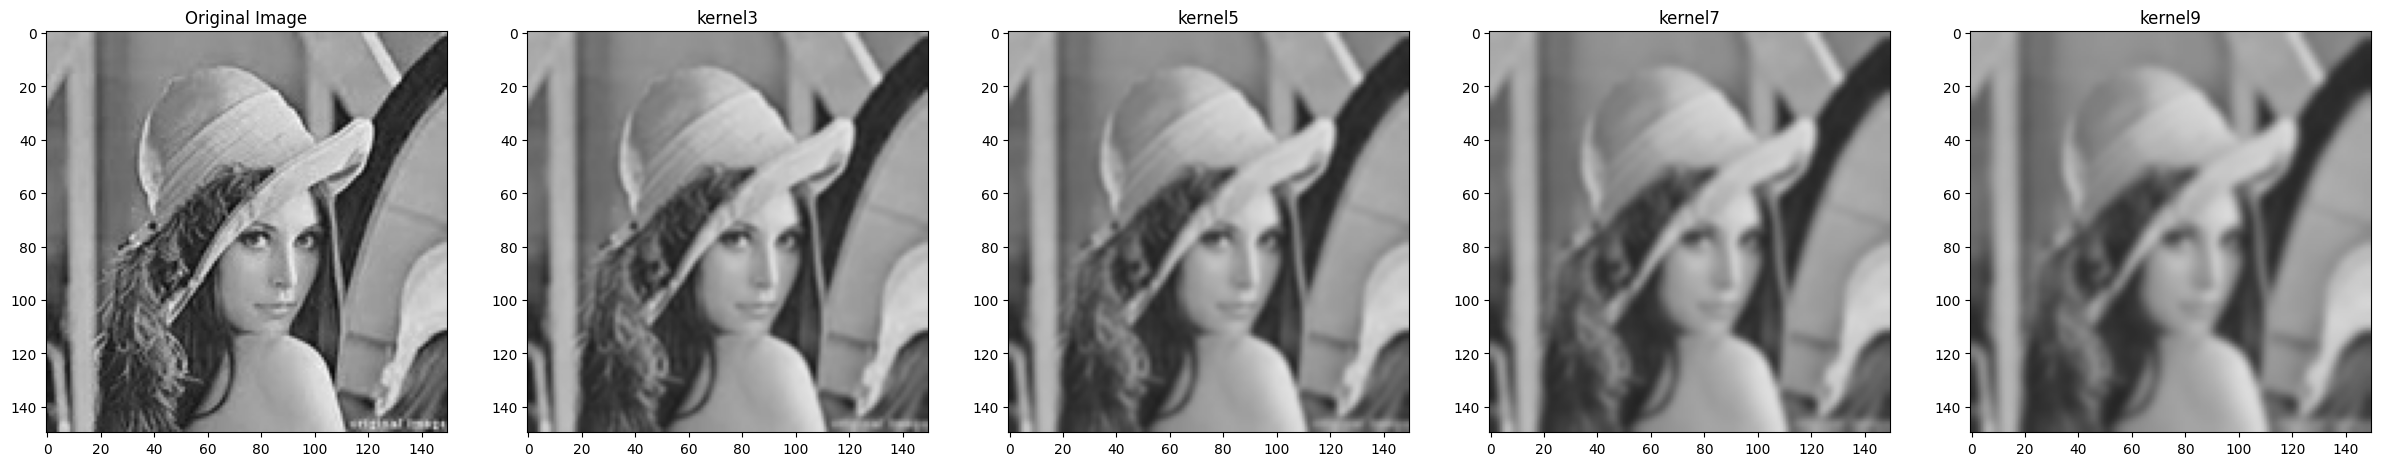

In [145]:
# Load the image
img6 = cv2.imread('image6.jpg')

# Apply Gaussian smoothing with kernel size of 3
kernel_size = 3
gaussian_image_3 = cv2.GaussianBlur(img6, (kernel_size, kernel_size), 0)

# Apply Gaussian smoothing with kernel size of 5
kernel_size = 5
gaussian_image_5 = cv2.GaussianBlur(img6, (kernel_size, kernel_size), 0)

# Apply Gaussian smoothing with kernel size of 7
kernel_size = 7
gaussian_image_7 = cv2.GaussianBlur(img6, (kernel_size, kernel_size), 0)

# Apply Gaussian smoothing with kernel size of 9
kernel_size = 9
gaussian_image_9 = cv2.GaussianBlur(img6, (kernel_size, kernel_size), 0)


# # display the original and filtered images side by side
plt.figure(figsize=(6*5, 4*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img6, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(gaussian_image_3, "gray"), plt.title("kernel3")
plt.subplot(153), plt.imshow(gaussian_image_5,"gray"), plt.title("kernel5")
plt.subplot(154), plt.imshow(gaussian_image_7, "gray"), plt.title("kernel7")
plt.subplot(155), plt.imshow(gaussian_image_9, "gray"), plt.title("kernel9")
plt.show()



##Morphology Operators

##Inspect the number of holes and the diameter of the holes

In [146]:
# Load the input image as a grayscale image
img_holes = cv2.imread('holes.jpg', 0)

# Add a padding of 10 pixels to the image to avoid edge effects during segmentation
padd = 10
img_holes = cv2.copyMakeBorder(img_holes, padd, padd, padd, padd, cv2.BORDER_CONSTANT,  value = 255)

# Apply Otsu's thresholding to convert the image to a binary image with black holes on a white background
ret, thresh = cv.threshold(img_holes,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

#noise removal
# Perform morphological opening 
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
# Compute the distance transform of the binary image to obtain a map of distance values from each pixel to the nearest hole boundary
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)

# Threshold the distance transform to obtain a binary image of the sure foreground (pixels that are definitely inside a hole)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region Compute the unknown region (pixels that are neither definitely inside nor definitely outside a hole)
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Compute the connected components of the sure foreground
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Increment the marker values of the unknown region by 1 to ensure that they are distinct from the background (0) (Add one to all labels so that sure background is not 0, but 1)
markers = markers + 1
# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed segmentation to the distance transform image using the markers as seeds
markers = cv.watershed(cv2.cvtColor(img_holes, cv2.COLOR_GRAY2BGR), markers)

# Label the holes in the original image with black color
img_holes[markers == -1] = 0

# Count the number of holes and calculate their diameters
count, area = np.unique(markers, return_counts=True)
diameters = [np.sqrt(count / np.pi) * 2 for count in area[2:]]

# Print the number of holes and their diameters
print("Number of holes in img_holes:")
print(len(count) - 2)
print("Diameters of the holes in img_holes:")
print(diameters)

Number of holes in img_holes:
4
Diameters of the holes in img_holes:
[98.57669199876187, 91.58658264568697, 80.0354180945074, 102.40312930003067]
